In [1]:
%pip install biopython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


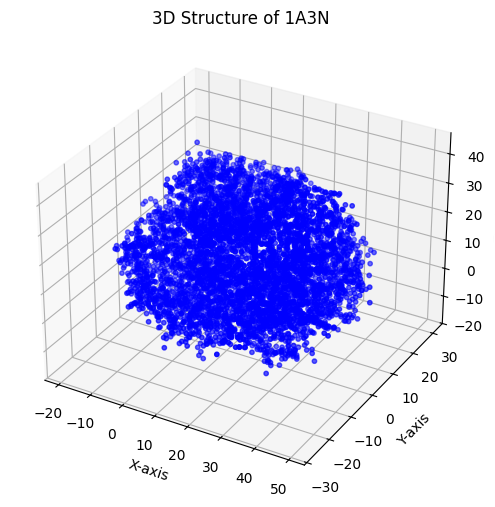

In [2]:
from Bio.PDB import PDBList, PDBParser
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Step 1: Download a PDB structure (if not already downloaded)
pdb_id = "1A3N"  # Replace with any valid PDB ID
pdb_filename = f"{pdb_id}.pdb"
pdbl = PDBList()
pdbl.retrieve_pdb_file(pdb_id, pdir=".", file_format="pdb")

# Step 2: Parse the PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure(pdb_id, f"pdb{pdb_id}.ent")

# Step 3: Extract atomic coordinates
atoms = []
for model in structure:
    for chain in model:
        for residue in chain:
            for atom in residue:
                atoms.append(atom.coord)

atoms = np.array(atoms)  # Convert list to NumPy array for easy plotting

# Step 4: Visualize the 3D structure using Matplotlib
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(atoms[:, 0], atoms[:, 1], atoms[:, 2], c="blue", marker="o", s=10)
ax.set_title(f"3D Structure of {pdb_id}")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.show()
